# Example of stiff ODE

Consider the following ODE:

$$\frac{df}{dt} = f^2 - f^3$$

We solve this ODE with the initial condition $f(0) = \delta$ over the time interval from $t = 0$ to
$t = 2/\delta$. 

In [41]:
## IMPORTS ##
from __future__ import division, print_function
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline
import PDSim.core.integrators as integrators # The abstract integrators with callback functions
from PDSim.misc.datatypes import arraym # An optimized list-like object with rapid element-wise operators

In [42]:
class TestIntegrator(object):
    """
    Implements the functions needed to satisfy the abstract base class requirements
    """

    def __init__(self):
        self.x, self.y = [], []
        

    def post_deriv_callback(self): 
        """ Don't do anything after the first call is made to deriv function """
        pass

    def premature_termination(self): 
        """ Don't ever stop prematurely """
        return False

    def get_initial_array(self):
        """ The array of initial values"""
        return arraym([self.delta])

    def pre_step_callback(self): 
        if self.Itheta == 0:
            self.x.append(self.t0)
            self.y.append(self.xold[0])

    def post_step_callback(self): 
        self.x.append(self.t0)
        self.y.append(self.xold[0])

    def derivs(self, t0, xold):
        
        dfdt = xold[0]**2 - xold[0]**3
        
        return arraym([dfdt])
            

And now we define the actual concrete implementations of the integrators, which are formed of the common functions and the abstract integrator

In [43]:
class TestEulerIntegrator(TestIntegrator, integrators.AbstractSimpleEulerODEIntegrator):
    """ Mixin class using the functions defined in TestIntegrator """
    pass

class TestHeunIntegrator(TestIntegrator, integrators.AbstractHeunODEIntegrator):
    """ Mixin class using the functions defined in TestIntegrator """
    pass

class TestRK45Integrator(TestIntegrator, integrators.AbstractRK45ODEIntegrator):
    """ Mixin class using the functions defined in TestIntegrator """
    pass
    

As an example,  we assume $\delta = 0.01$. After the transition from 0 to 1, the time step is very small and the computation goes slowly. For smaller values of $\delta$, the situation is even worse resulting in overflow. 

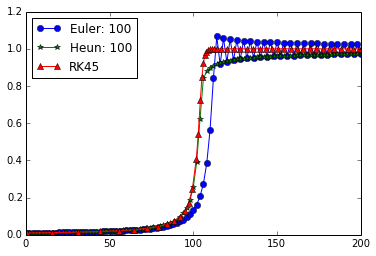

In [44]:
delta = 0.01

for N in [100]:
    TEI = TestEulerIntegrator()
    TEI.delta = delta
    TEI.do_integration(N, 0.0, 2/delta)
    plt.plot(TEI.x, TEI.y, 'o-', label = 'Euler: ' + str(N))

for N in [100]:
    THI = TestHeunIntegrator()
    THI.delta = delta
    THI.do_integration(N, 0.0, 2/delta)
    plt.plot(THI.x, THI.y, '*-', label = 'Heun: ' + str(N))

TRKI = TestRK45Integrator()
TRKI.delta = delta
TRKI.do_integration(0.0, 2/delta, eps_allowed = 1e-5)
plt.plot(TRKI.x, TRKI.y, '^-', label = 'RK45')
lgnd = plt.legend(loc='best')